<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# Agrega tu usuario
he4tnix
# Agrega el enlace al repositorio para tus trabajo
https://github.com/he4tnix/multimedia_tasks.git

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

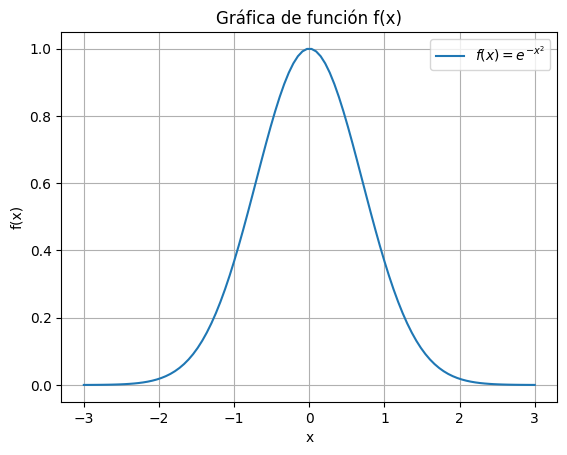

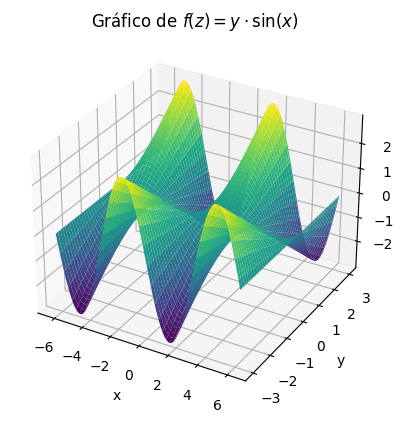

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-3,3,100)
z=np.linspace(-2*np.pi,2*np.pi,100)

#Se define 'f(x)=e^{-x^2}'
def f(x):
  return np.exp(-x**2)

#Se define la función f(z)
def g(z, x):
    return x * np.sin(z)

y=f(x)

Z, X = np.meshgrid(z, x)
H = g(Z, X)

#Se grafica f(x)
plt.plot(x,y, label='$f(x) = e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de función f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la función f(z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z, X, H, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(z)')
ax.set_title('Gráfico de $f(z) = y \cdot \sin(x)$')
plt.show()

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


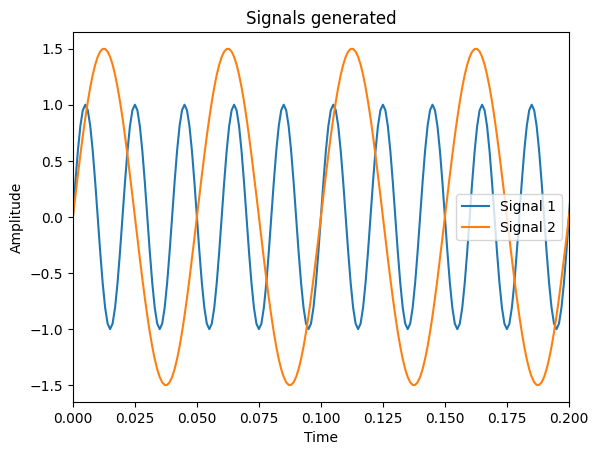

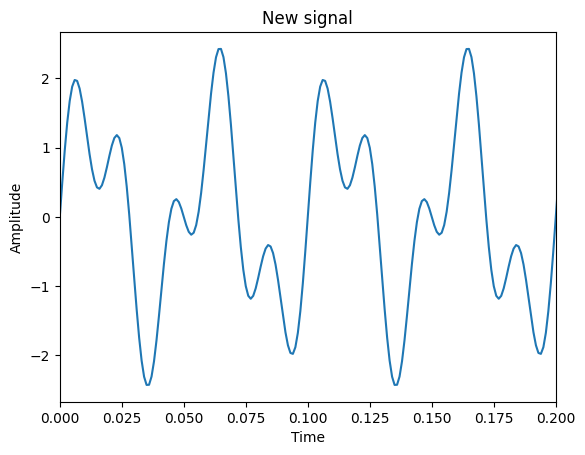

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Freq1 = 50
Freq2 = 20
step = 10**-3

Time = np.arange(0, 1, step)
Signal1 = np.sin(2*np.pi*Freq1*Time)
Signal2 = 1.5*np.sin(2*np.pi*Freq2*Time)
RSignal = Signal1 + Signal2

#Gráfica de señales

plt.plot(Time, Signal1, label='Signal 1')
plt.plot(Time, Signal2, label='Signal 2')
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signals generated')
plt.legend()
plt.show()

#Grafica de señal combinada
plt.plot(Time, RSignal)
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('New signal')
plt.show()


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


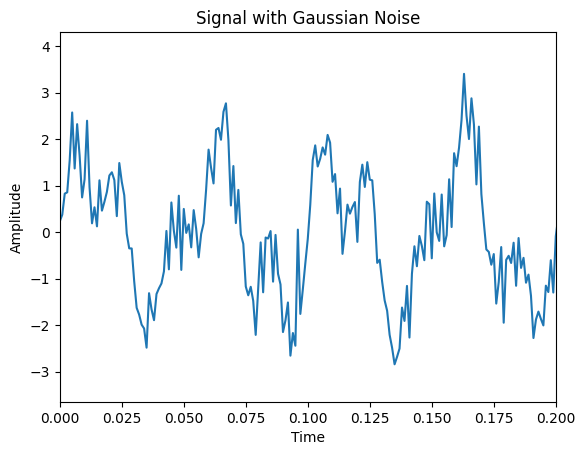

In [4]:
#Añadiendo Ruido Gaussiano a la señal creada

GaussianNoise=0.5*np.random.randn(len(Time))
SignalwGNoise= RSignal + GaussianNoise

#Grafica de señal con ruido Gaussiano
plt.plot(Time, SignalwGNoise)
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with Gaussian Noise')
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

El ruido blanco Gaussiano es linealmente plano, la señal de este ruido contiene todas las frencuencias y en todas mantiene la misma potencia. Mientras que para el ruido rosa, su potencia decae en 3 dB por cada octava a medida que se sube en frecuencia. Esto se demuestra al graficar ambos ruidos en el dominio de Fourier así comparando sus comportamientos


<ipython-input-6-ea0c62645df9>:24: RuntimeWarning: divide by zero encountered in log10
  Pink_dB = 20*np.log10(np.abs(PinkFFT))


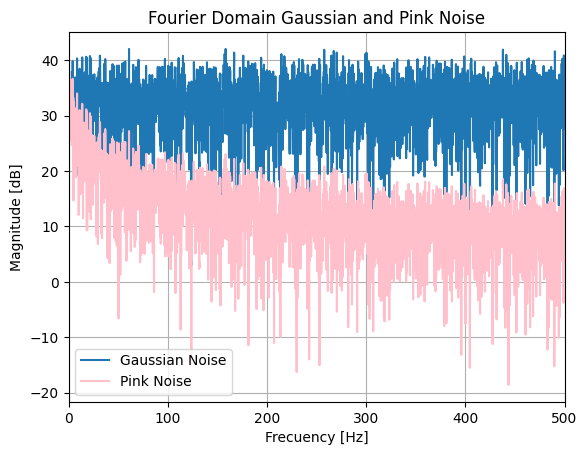

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Step = 10**3
Time = 10
Samples = Step*Time

#Se genera Ruido Gaussiano, se calcula su FFT y se extrae su frecuencia
GaussianNoise =0.5*np.random.randn(Samples)
GaussianFFT = np.fft.rfft(GaussianNoise)
Freq0 = np.fft.rfftfreq(Samples, d=1/Step)

#Se crea un escalado basado en la frecuencia del Ruido Gaussiano
#Para crear el ruido Rosa

S = np.zeros_like(Freq0)
S[1:] = 1/np.sqrt(Freq0[1:])
PinkFFT = GaussianFFT * S

#Se extrae frecuencias y magnitud en dB para cada ruido
GaussianFreq = np.fft.fftfreq(len(np.abs(GaussianFFT)),1/Step)
PinkFreq = np.fft.fftfreq(len(np.abs(PinkFFT)),1/Step)
Gaussian_dB = 20*np.log10(np.abs(GaussianFFT))
Pink_dB = 20*np.log10(np.abs(PinkFFT))

#Se extraen frecuencias positivas para los ruidos
Freq1 = GaussianFreq>=0
Freq2 = PinkFreq>=0
GaussianFreq = GaussianFreq[Freq1]
PinkFreq = PinkFreq[Freq2]
Gaussian_dB = Gaussian_dB[Freq1]
Pink_dB = Pink_dB[Freq2]

#Se Grafica en el dominio de Fourier
plt.plot(GaussianFreq, Gaussian_dB, label='Gaussian Noise')
plt.plot(PinkFreq, Pink_dB, color='pink', label='Pink Noise')
plt.xlim(0, 500)
plt.title('Fourier Domain Gaussian and Pink Noise')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid(True)


## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a

[Graficar tridimensionalmente en Python]: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

[White and Pink noise generation]https://ades-blog.tiempo.llc/understanding-pink-noise-generation-in-python/

